In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Python for Data Science (1)/PROJECT
!ls

/content/drive/My Drive/Python for Data Science (1)/PROJECT
 covid.csv     Heart_Disease_Prediction1.ipynb	 student-mat.csv
 COVID.ipynb  'Heart Disease Prediction.ipynb'
 heart.csv     student.ipynb


1. EXPLORATORY DATA ANALYSIS (EDA)


In [ ]:
# IMPORT LIBRARY
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
filename = 'heart.csv'
dataset = read_csv(filename)

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


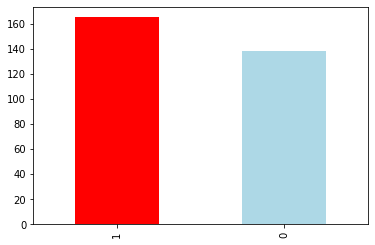

In [ ]:
dataset.target.value_counts().plot(kind='bar', color=['red', 'lightblue'])


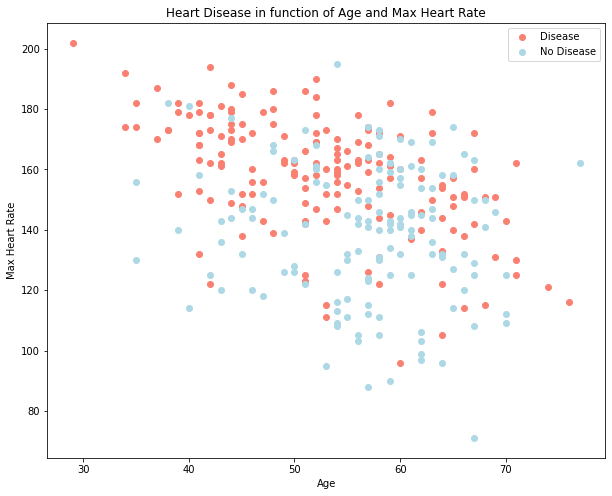

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="salmon")
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

         age    sex     cp  trestbps  ...  slope     ca   thal  target
count  303.0  303.0  303.0     303.0  ...  303.0  303.0  303.0   303.0
mean    54.4    0.7    1.0     131.6  ...    1.4    0.7    2.3     0.5
std      9.1    0.5    1.0      17.5  ...    0.6    1.0    0.6     0.5
min     29.0    0.0    0.0      94.0  ...    0.0    0.0    0.0     0.0
25%     47.5    0.0    0.0     120.0  ...    1.0    0.0    2.0     0.0
50%     55.0    1.0    1.0     130.0  ...    1.0    0.0    2.0     1.0
75%     61.0    1.0    2.0     140.0  ...    2.0    1.0    3.0     1.0
max     77.0    1.0    3.0     200.0  ...    2.0    4.0    3.0     1.0

[8 rows x 14 columns]


In [ ]:
set_option('precision', 2)
cor = dataset.corr(method='pearson')

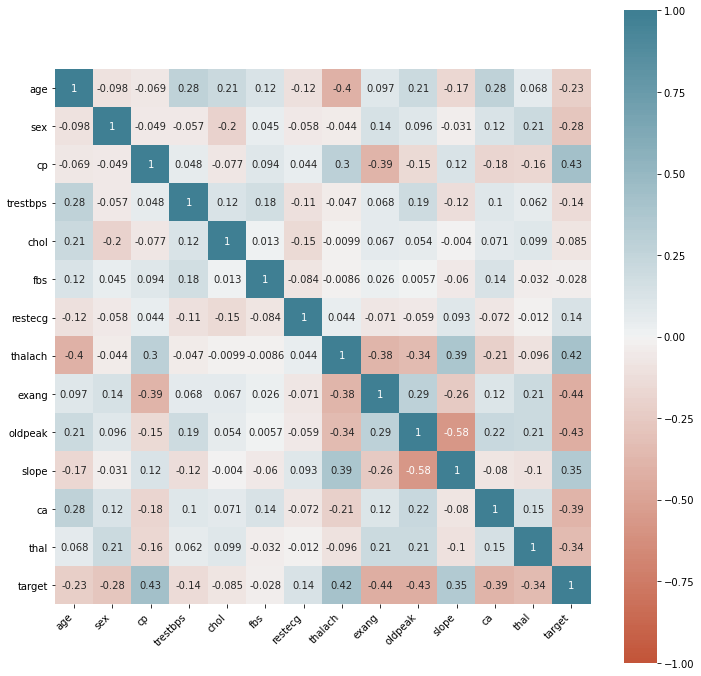

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
    cor,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220, n=200),
    square=True,
    ax = ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

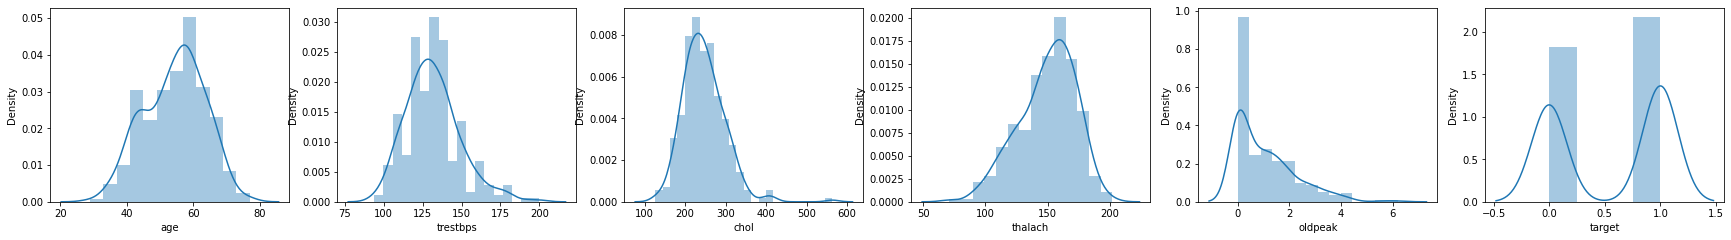

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(30, 25))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(dataset[f], kde=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


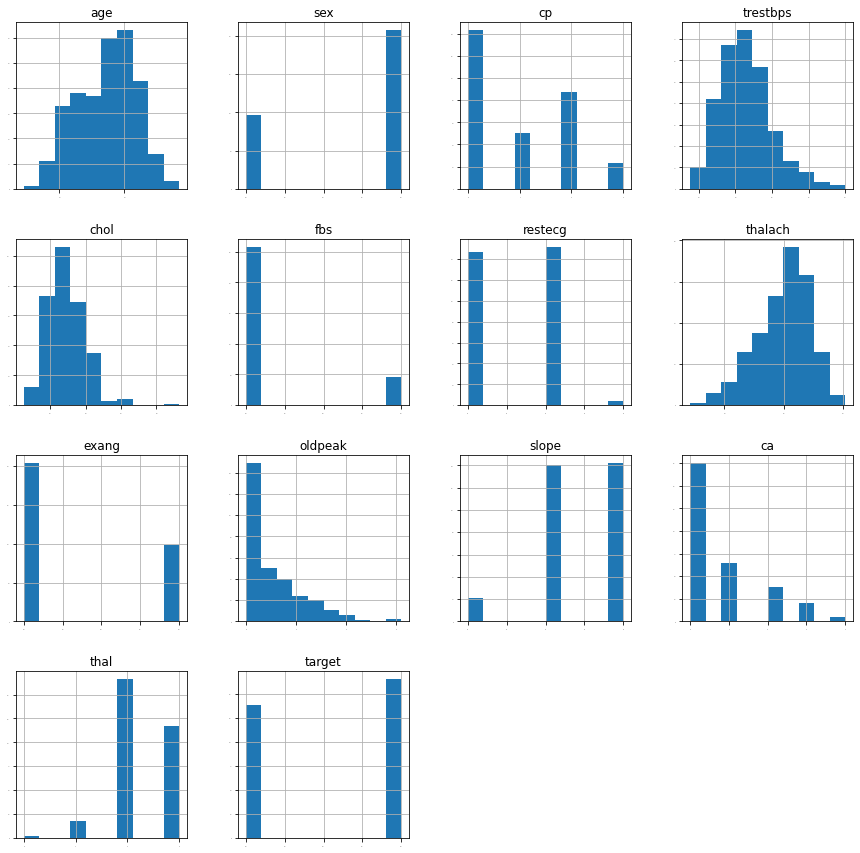

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, ax=ax)
pyplot.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


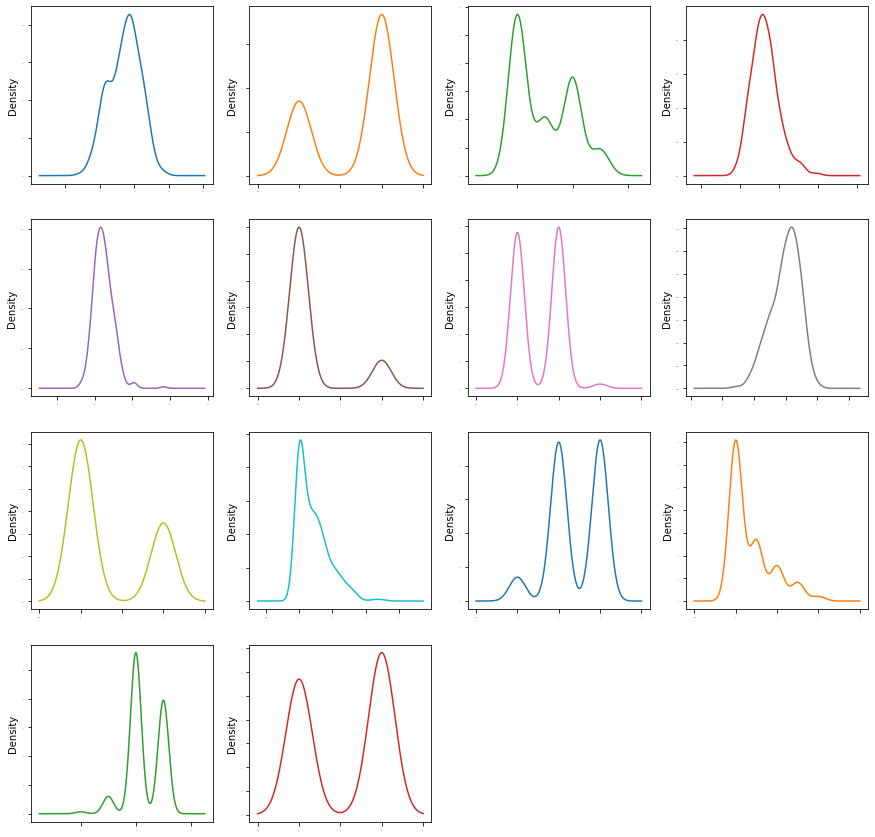

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, ax=ax)
pyplot.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


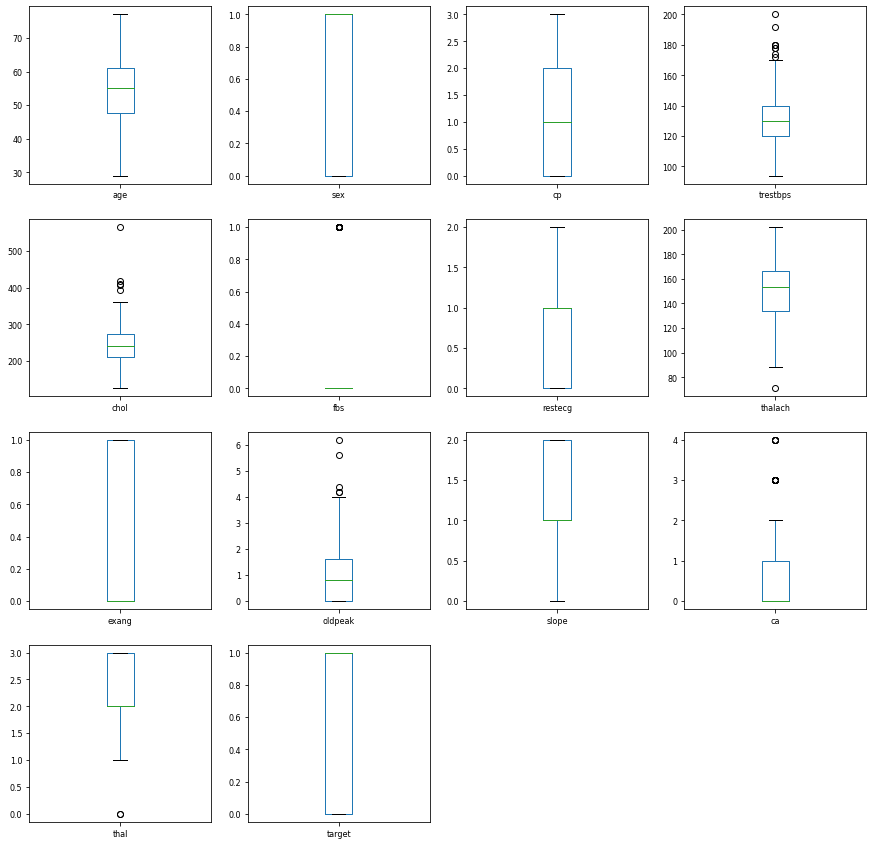

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
pyplot.show()

2. DATA PRE PROCESSING


In [ ]:
# Extract Independent and Target Variables
nominal_features = ['cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(dataset.drop(['target'], axis = 1), 
                   columns = nominal_features, drop_first=True).values
y = dataset.target.values

In [ ]:
# Split the Data into Train and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Dimensionality Reduction
print("Shape of X before Dimensionlity Reduction: ", x_train.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

print("Shape of X after Dimensionlity Reduction: ", x_train.shape)

Shape of X before Dimensionlity Reduction:  (242, 19)
Shape of X after Dimensionlity Reduction:  (242, 1)


3. BUILD AND TRAIN MODEL



In [ ]:
# SVM, Kernel = 'linear'
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)

In [ ]:
# SVM, Kernel = 'rbf'
classifier_rbf = SVC(kernel='rbf', gamma=0.1, C=1.0)
classifier_rbf.fit(x_train, y_train)
y_pred_svm_rbf = classifier_rbf.predict(x_test)

In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(x_train, y_train)
y_pred_tree = classifier_tree.predict(x_test)

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
  if train:
    pred = clf.predict(x_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True ))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
  elif train == False:
    pred = clf.predict(x_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True ))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
# K-FOLD CROSS VALIDATION

# SVM, KERNEL = 'LINEAR'
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = 10)


print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())
print_score(classifier, x_train, y_train, x_test, y_test, train=True)


Scores:  [0.76       0.88       0.875      0.83333333 0.95833333 0.83333333
 0.91666667 0.83333333 0.79166667 0.91666667]
Accuracy:  86.0 %
Standard Deviation: +/- 0.05789573962448936
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.89    0.84      0.86       0.86          0.86
recall       0.79    0.92      0.86       0.85          0.86
f1-score     0.84    0.88      0.86       0.86          0.86
support    111.00  131.00      0.86     242.00        242.00


In [ ]:
# SVM, KERNEL = 'RBF'
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_rbf, x_train, y_train, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())
print_score(classifier_rbf, x_train, y_train, x_test, y_test, train=True)


Scores:  [0.76       0.84       0.83333333 0.83333333 0.95833333 0.83333333
 0.91666667 0.83333333 0.79166667 0.91666667]
Accuracy:  85.0 %
Standard Deviation: +/- 0.05771577870141848
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.89    0.83      0.85       0.86          0.85
recall       0.77    0.92      0.85       0.85          0.85
f1-score     0.83    0.87      0.85       0.85          0.85
support    111.00  131.00      0.85     242.00        242.00


In [ ]:
# KNN
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_knn, x_train, y_train, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())
print_score(classifier_knn, x_train, y_train, x_test, y_test, train=True)


Scores:  [0.8        0.88       0.875      0.875      0.91666667 0.79166667
 0.875      0.95833333 0.70833333 0.95833333]
Accuracy:  86.0 %
Standard Deviation: +/- 0.07399343063933296
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.90    0.87      0.88       0.89          0.89
recall       0.84    0.92      0.88       0.88          0.88
f1-score     0.87    0.90      0.88       0.88          0.88
support    111.00  131.00      0.88     242.00        242.00


In [ ]:
# DECISION TREE
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_tree, x_train, y_train, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())
print_score(classifier_tree, x_train, y_train, x_test, y_test, train=True)
print_score(classifier_tree, x_train, y_train, x_test, y_test, train=False)


Scores:  [0.64       0.84       0.75       0.83333333 0.75       0.75
 0.75       0.875      0.70833333 0.875     ]
Accuracy:  78.0 %
Standard Deviation: +/- 0.07262938646152656
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    111.0  131.0       1.0      242.0         242.0
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.82   0.77      0.79       0.79          0.79
recall      0.67   0.88      0.79       0.77          0.79
f1-score    0.73   0.82      0.79       0.78          0.78
support    27.00  34.00      0.79      61.00         61.00


4. MODEL OPTIMIZATION USING GRID SEARCH TECHNIQUE









In [ ]:
# SVM 
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)


Best Score:  0.8598333333333334
Best Params:  {'C': 1, 'kernel': 'linear'}


In [ ]:
# KNN
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = classifier_knn, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)

Best Score:  0.8638333333333333
Best Params:  {'n_neighbors': 5}


5. MODEL EVALUATION

In [ ]:
# prepare the model
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = KNeighborsClassifier()
model.fit(rescaledX, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))

0.16393442622950818


KNeighborClassifier with n_neighbors = 5 will be chosen;
accuracy ~ 86%;
mse ~ 0.16393